<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 4</h3>
    <h5>Ejercicio 2</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

In [ ]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime
import scipy.stats
import pylab
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from statsmodels.tsa.arima_model import ARMA
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
import statsmodels.tsa.stattools as tsa
from sklearn.metrics import mean_absolute_error, mean_squared_error



from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

sns.set(rc={'figure.figsize':(20,10)})

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [ ]:
datos_globales_url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
dato = pd.read_csv(datos_globales_url, index_col='Date_reported', parse_dates=True)
dato.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
#Filtro Argentina
arg = dato[dato['Country'] == 'Argentina']

In [ ]:
#Trabajo los N/A
arg.New_cases.isna().sum()
arg_test_final = arg.copy()

In [ ]:
#Definimos periodos a analizar

arg = arg[arg.index < '2021-10-31']
arg = arg[arg.index > '2020-03-05']

# Para test
arg_test_final = arg_test_final[arg_test_final.index < '2021-11-30']
arg_test_final = arg_test_final[arg_test_final.index > '2021-10-31']

In [ ]:
#Eliminamos columnas sin uso
arg = arg['New_cases']
arg_test_final = arg_test_final['New_cases']

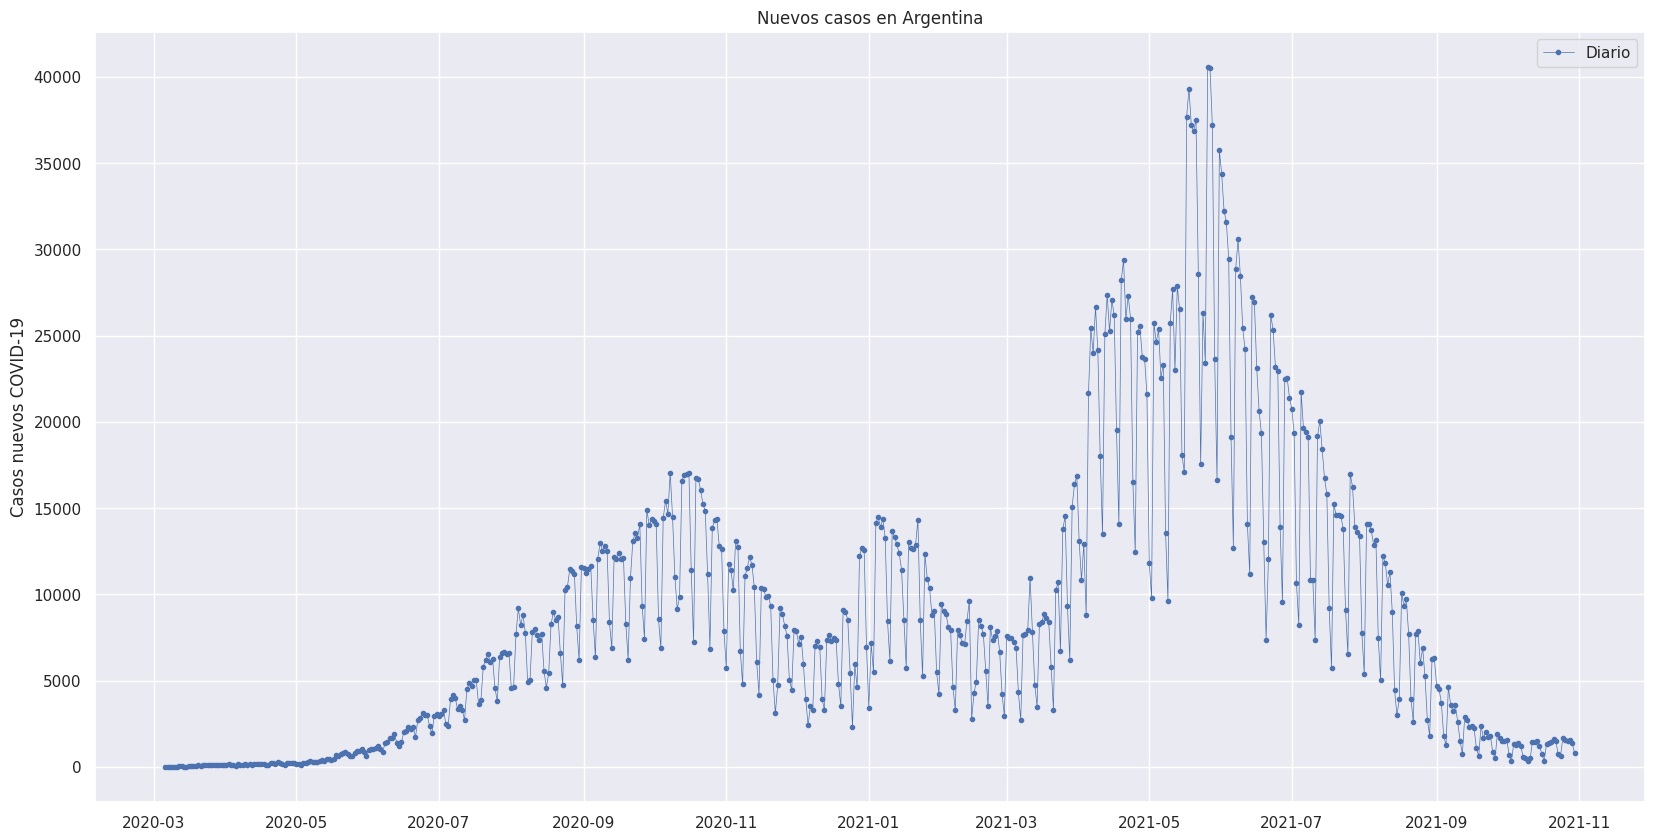

In [ ]:
#Visualización serie original

plt.plot(arg.loc['2020-03':,], marker='.', linestyle='-', linewidth=0.5, label='Diario')
plt.ylabel('Casos nuevos COVID-19')
plt.legend()
plt.title('Nuevos casos en Argentina')
plt.show()

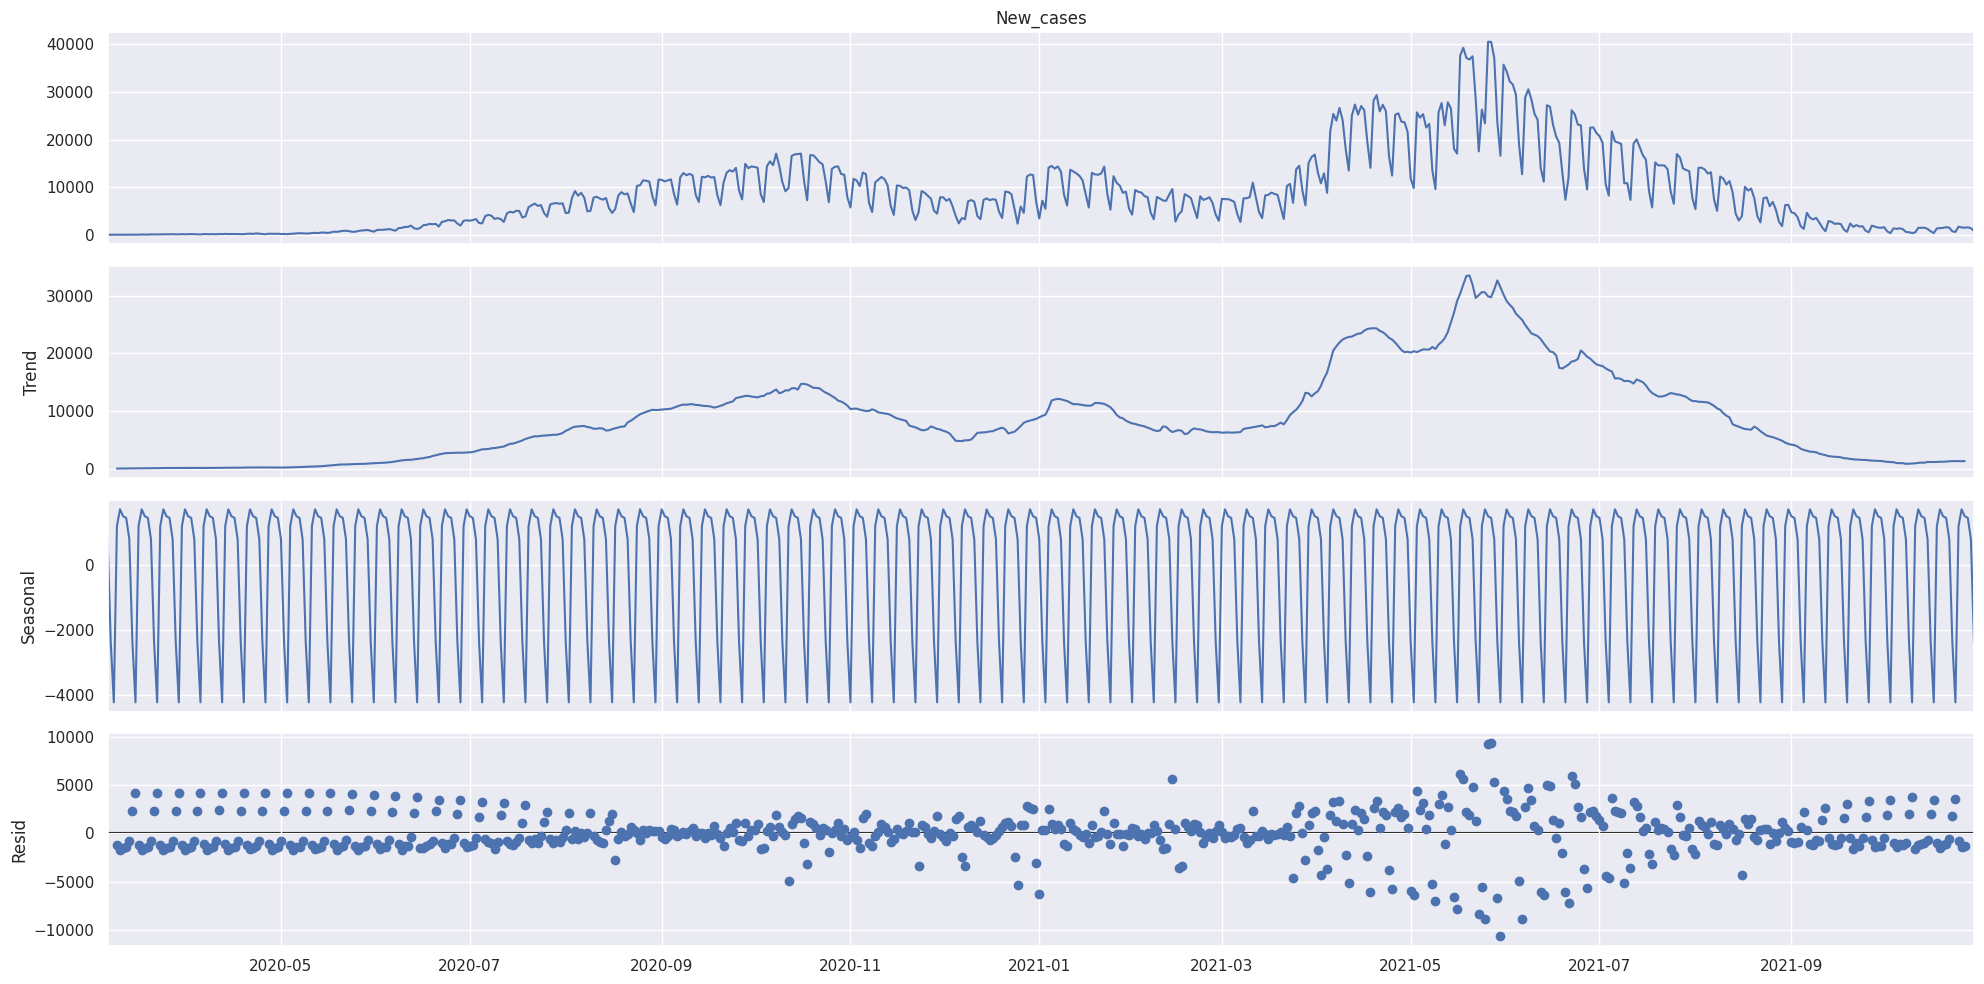

In [ ]:
#Descomposición aditiva

s_dec_additive = seasonal_decompose(arg, model = "adittive")
s_dec_additive.plot()
plt.show()

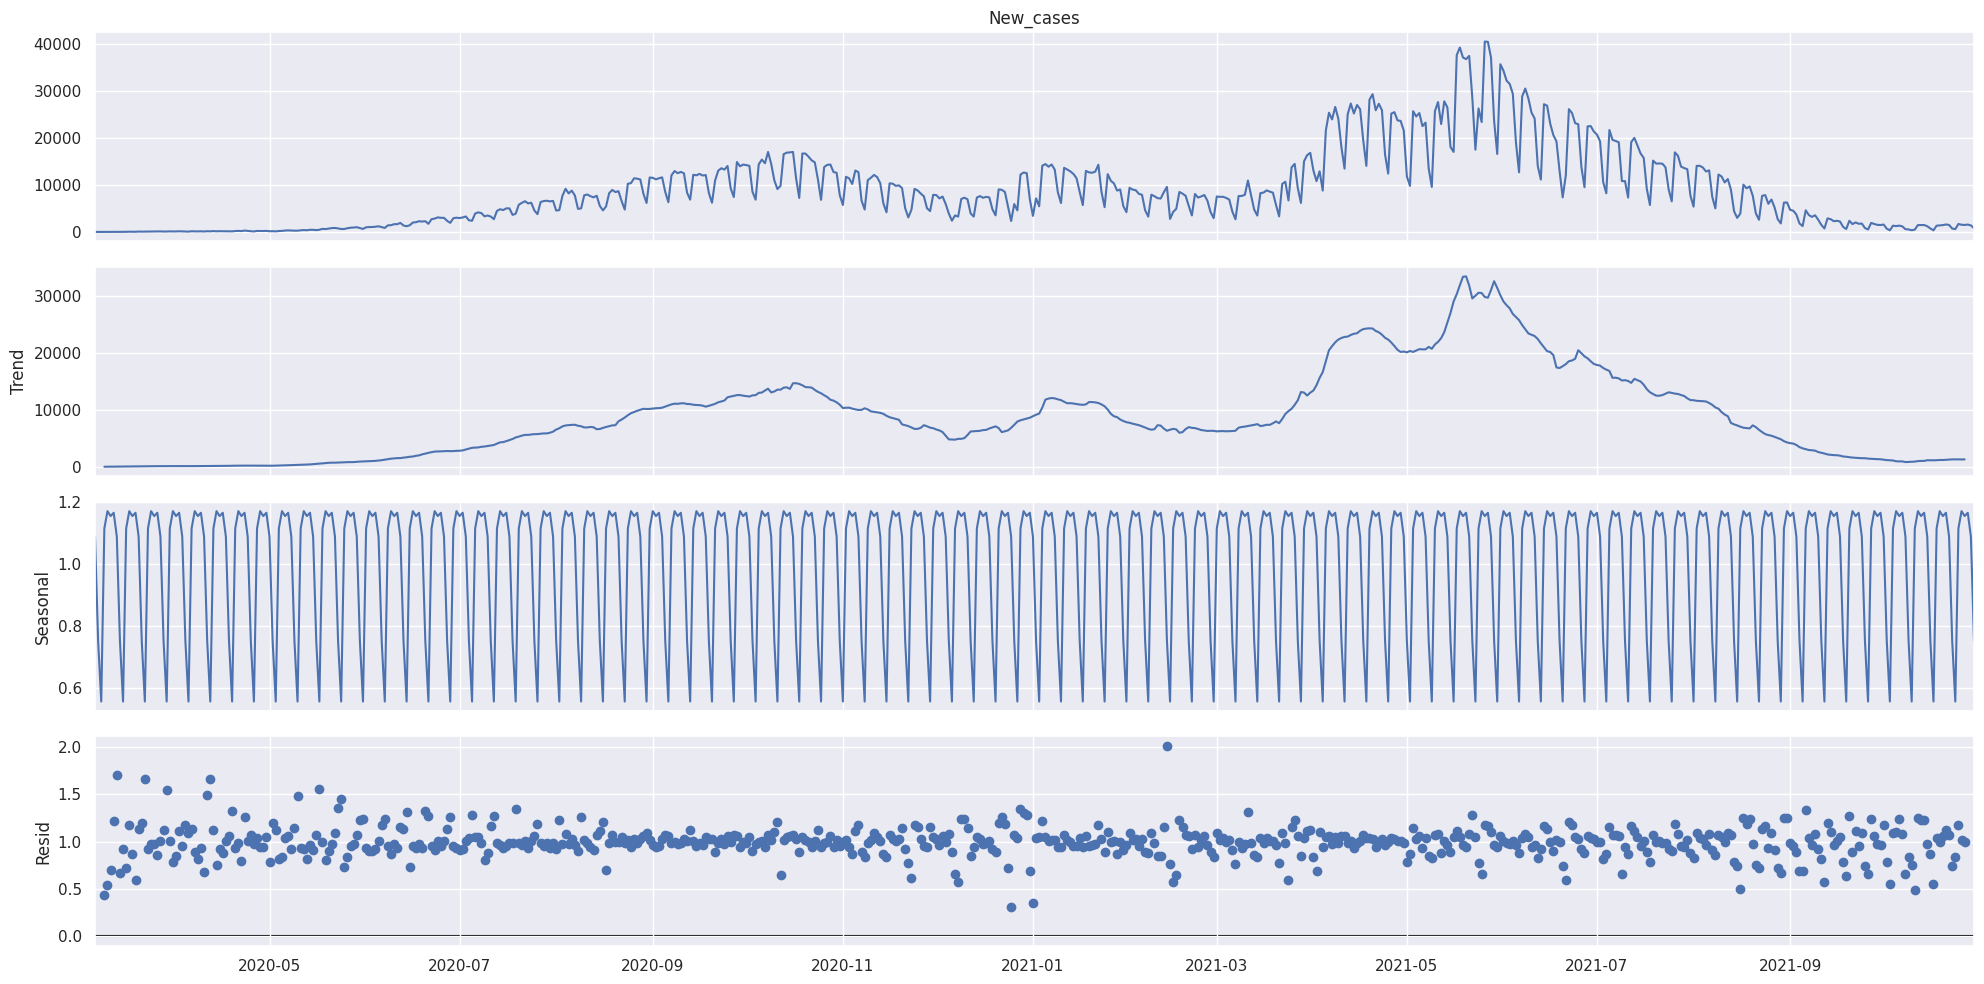

In [ ]:
#Descomposición multiplicativa

s_dec_multiplicative = seasonal_decompose(arg, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

In [ ]:
''' Función para analizar siguientes test =

- Prueba de Dickey-Fuller aumentada
- Prueba de Kwiatkowski-Phillips-Schmidt-Shin
- Prueba de Phillips-Perron '''

def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [ ]:
# Resultados Test

estacionario(arg)

Estimado de número de diferencias con ADF test
1
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.9563906831187233, True)


In [ ]:
#Diferenciación de la serie en un período

arg_diff=arg.copy()
arg_diff=arg_diff.diff(periods = 1)
arg_diff.drop(['2020-03-06'], inplace=True)

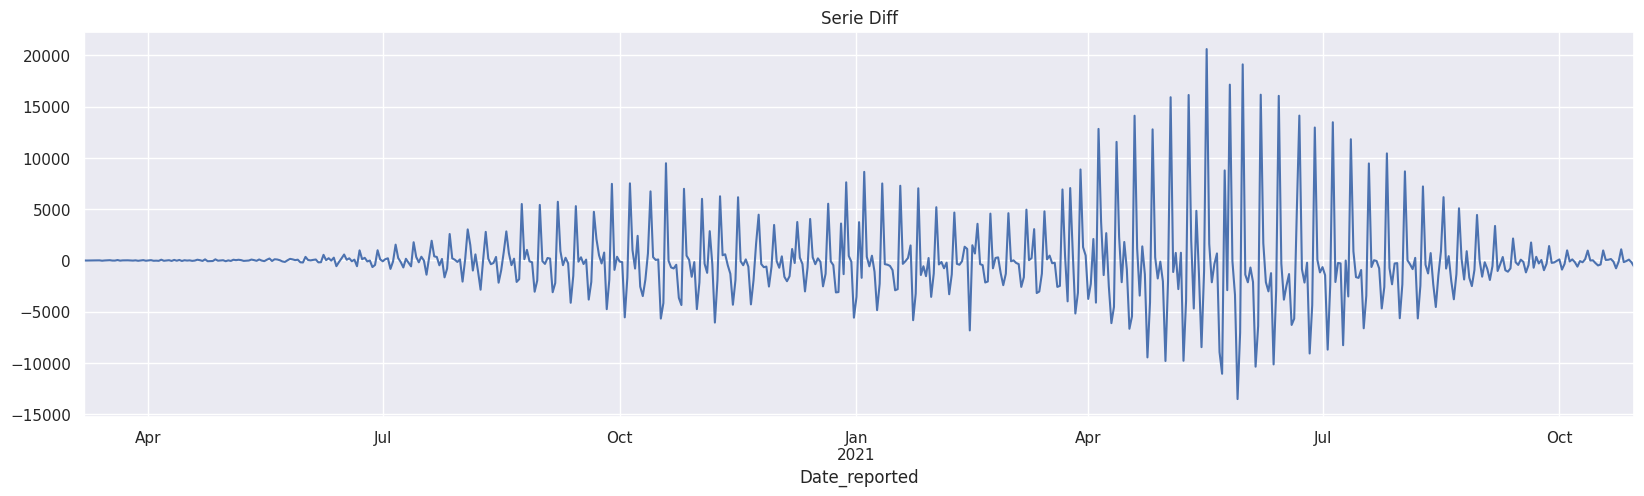

In [ ]:
#Visualización serie diferenciada

arg_diff.plot(figsize=(20,5), title = "Serie Diff")
plt.show()

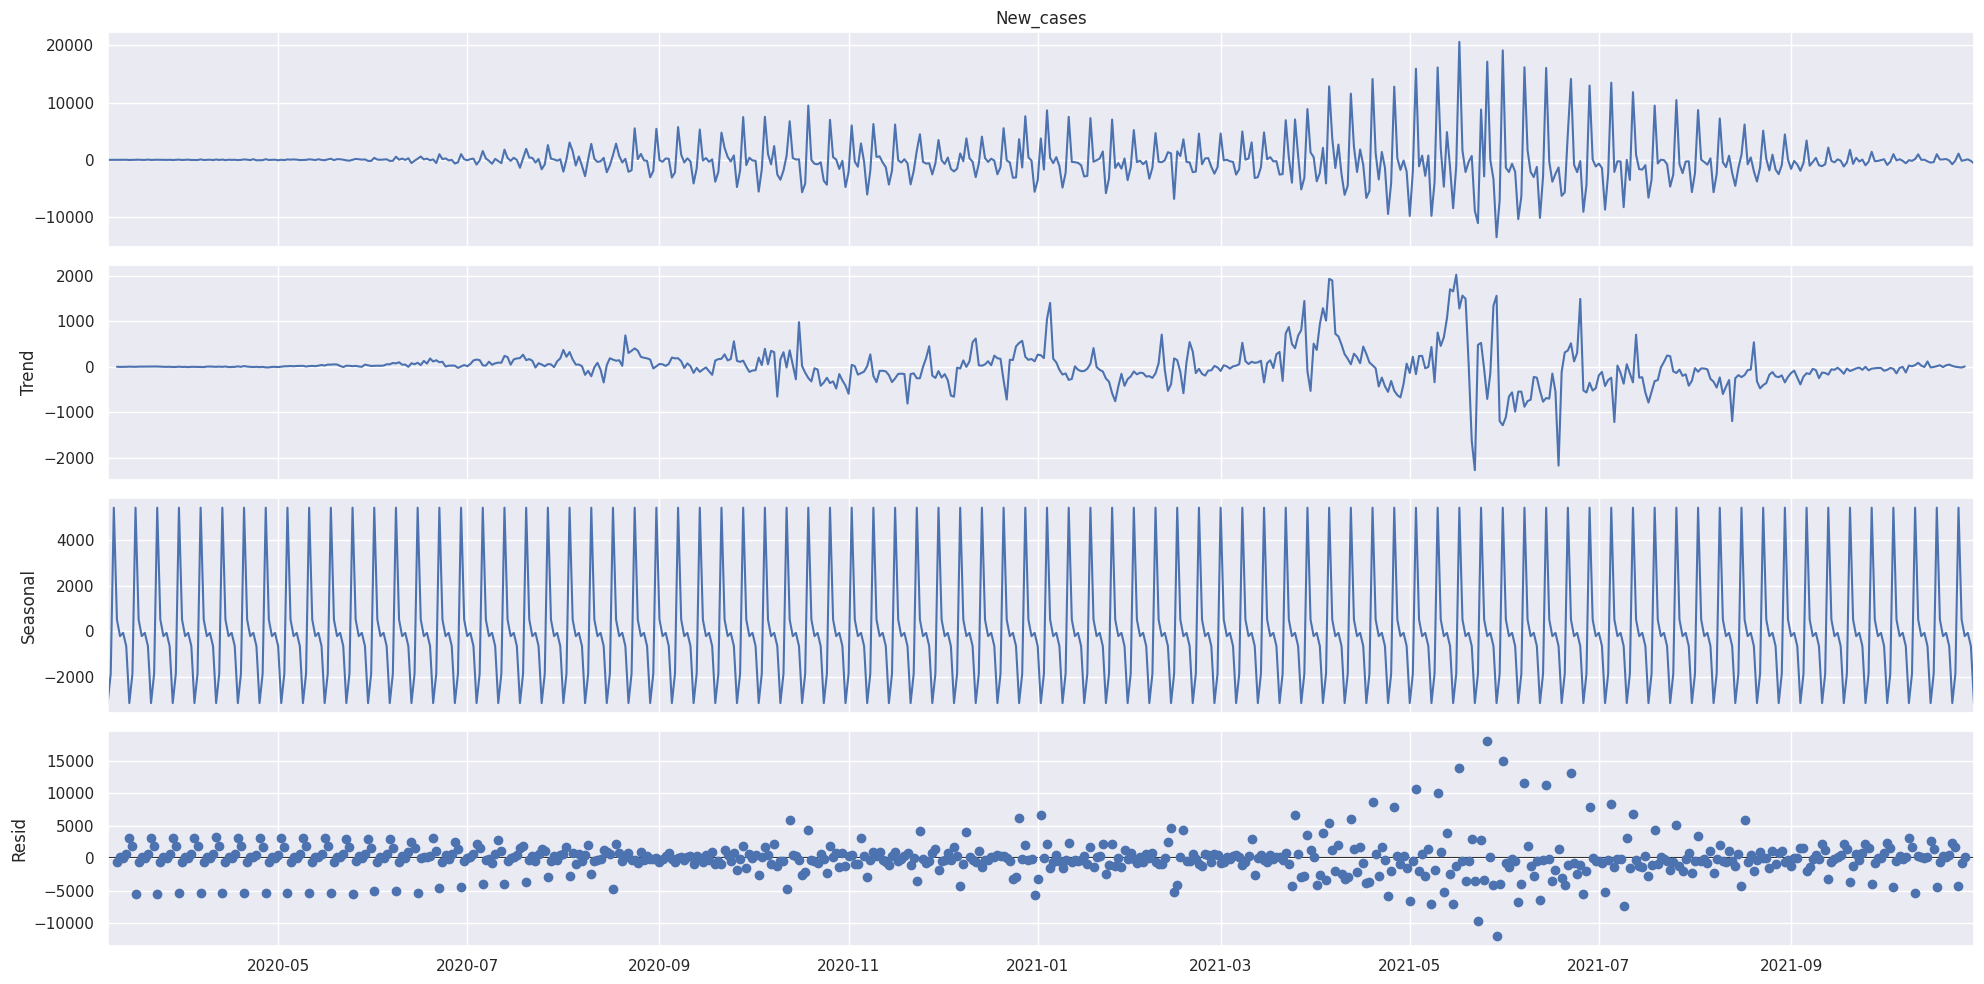

'\nExtra, probar =\n\ns_dec_additive = seasonal_decompose(arg_diff, model = "multiplicative")   adittive\ns_dec_additive.plot()\nplt.show()\n'

In [ ]:
#Descomposición aditiva de la serie diferenciada

s_dec_additive = seasonal_decompose(arg_diff, model = "adittive")
s_dec_additive.plot()
plt.show()


'''
Extra, probar =

s_dec_additive = seasonal_decompose(arg_diff, model = "multiplicative")
s_dec_additive.plot()
plt.show()
'''

In [ ]:
# Funcion para graficar

def graficar(serie, titulo="", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])
    serie.plot()
    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

Date_reported
2020-03-14    -24.0
2020-03-15      7.0
2020-03-16      9.0
2020-03-17     25.0
2020-03-18    -10.0
              ...  
2021-10-26   -209.0
2021-10-27   -122.0
2021-10-28    -58.0
2021-10-29    -68.0
2021-10-30    168.0
Name: New_cases, Length: 596, dtype: float64

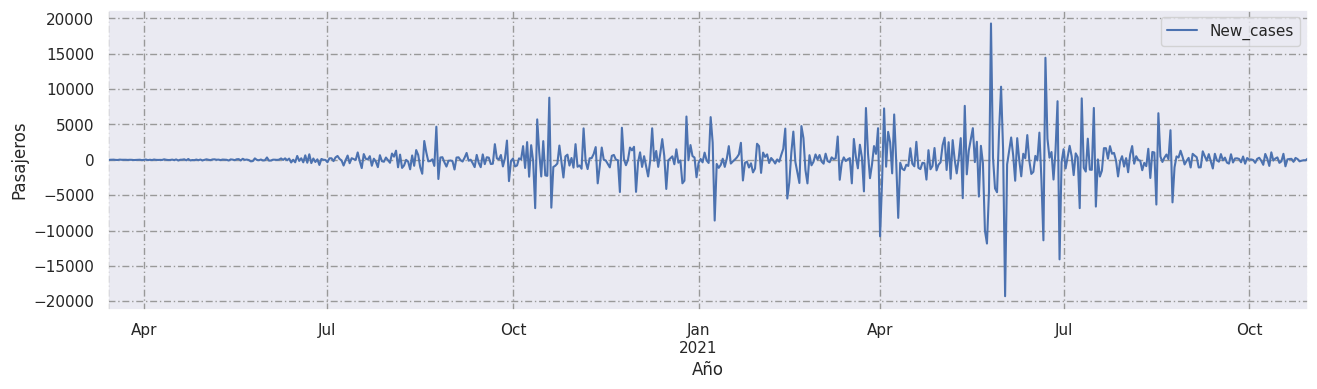

In [ ]:
# Para remover la estacionalidad semanal,
# Hacemos una diferencia semanal y en el grafico ya no observamos
# un patron repetitivo

arg_diff_7 = arg_diff - arg_diff.shift(7)
arg_diff_7= arg_diff_7.dropna()
graficar(arg_diff_7)
arg_diff_7


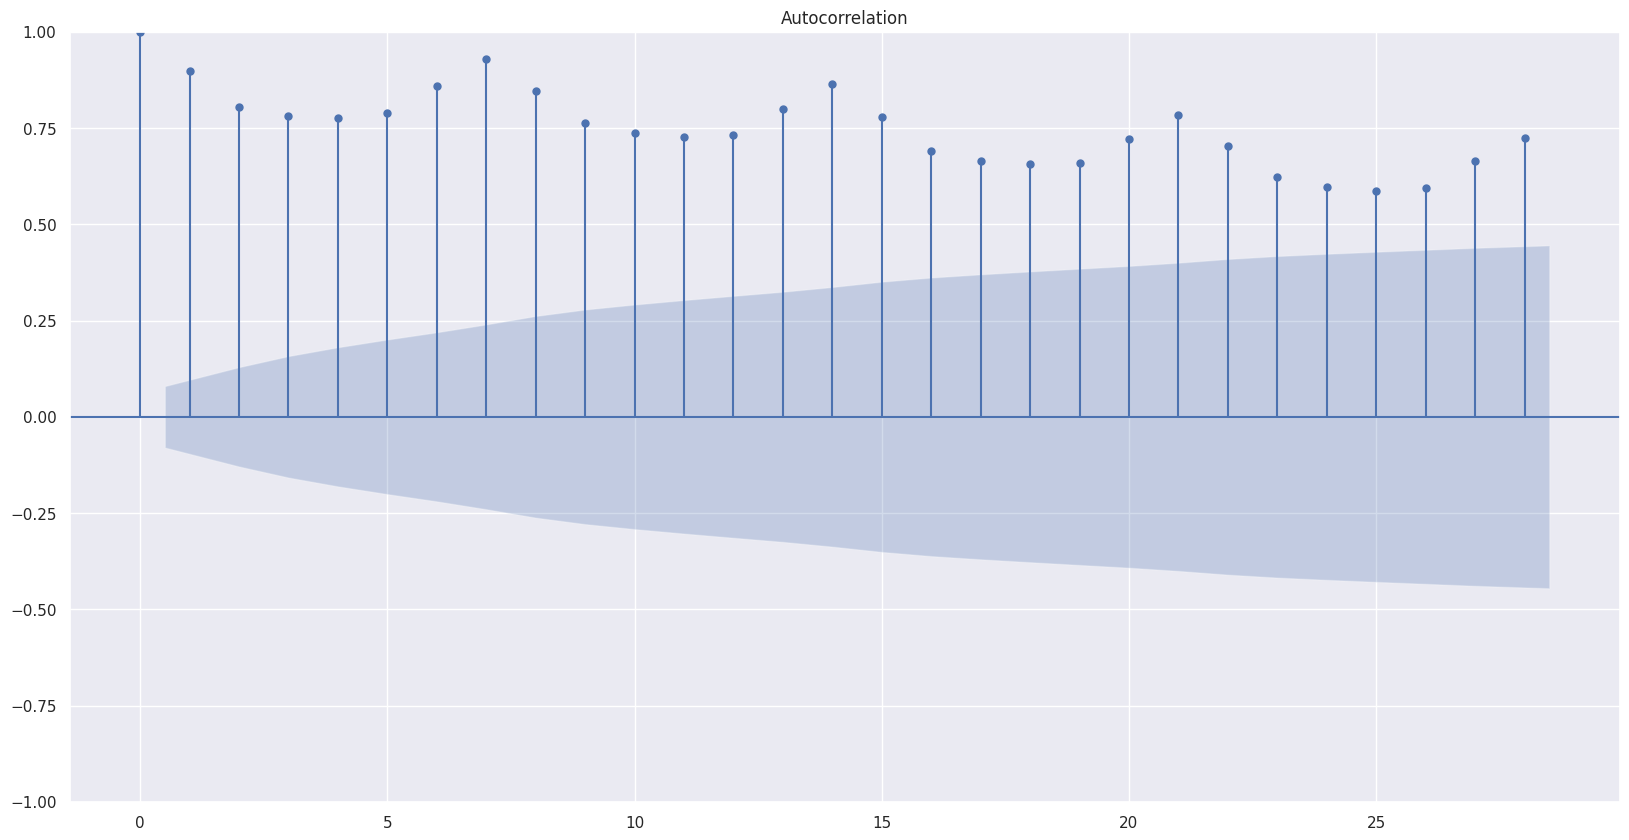

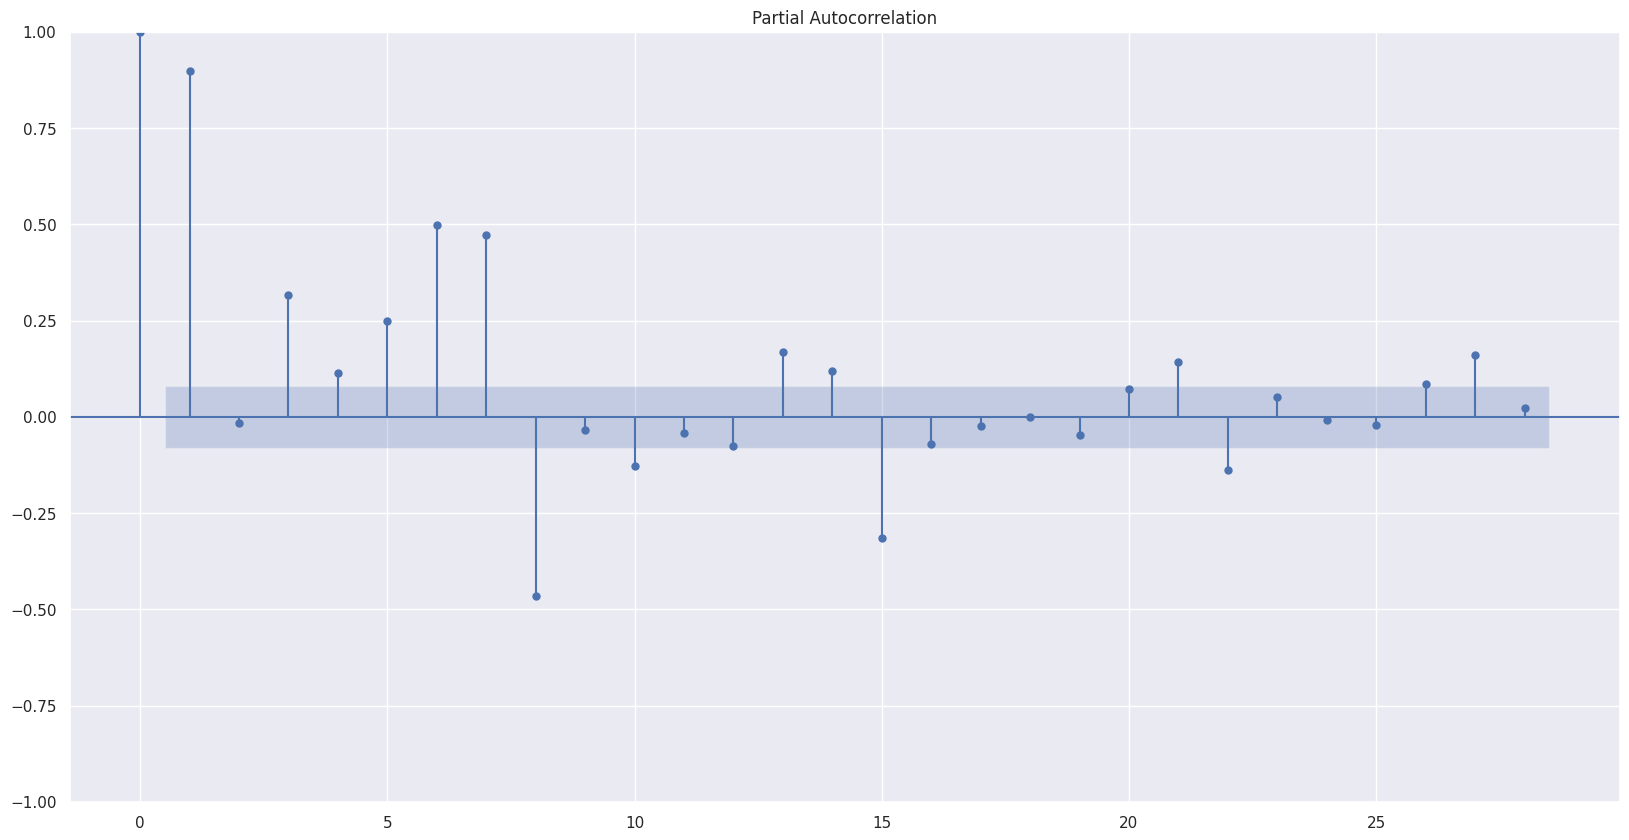

In [ ]:
# Grafico autocorrelación y autocorrelación parcial de la serie original

plot_acf(arg);
plot_pacf(arg);

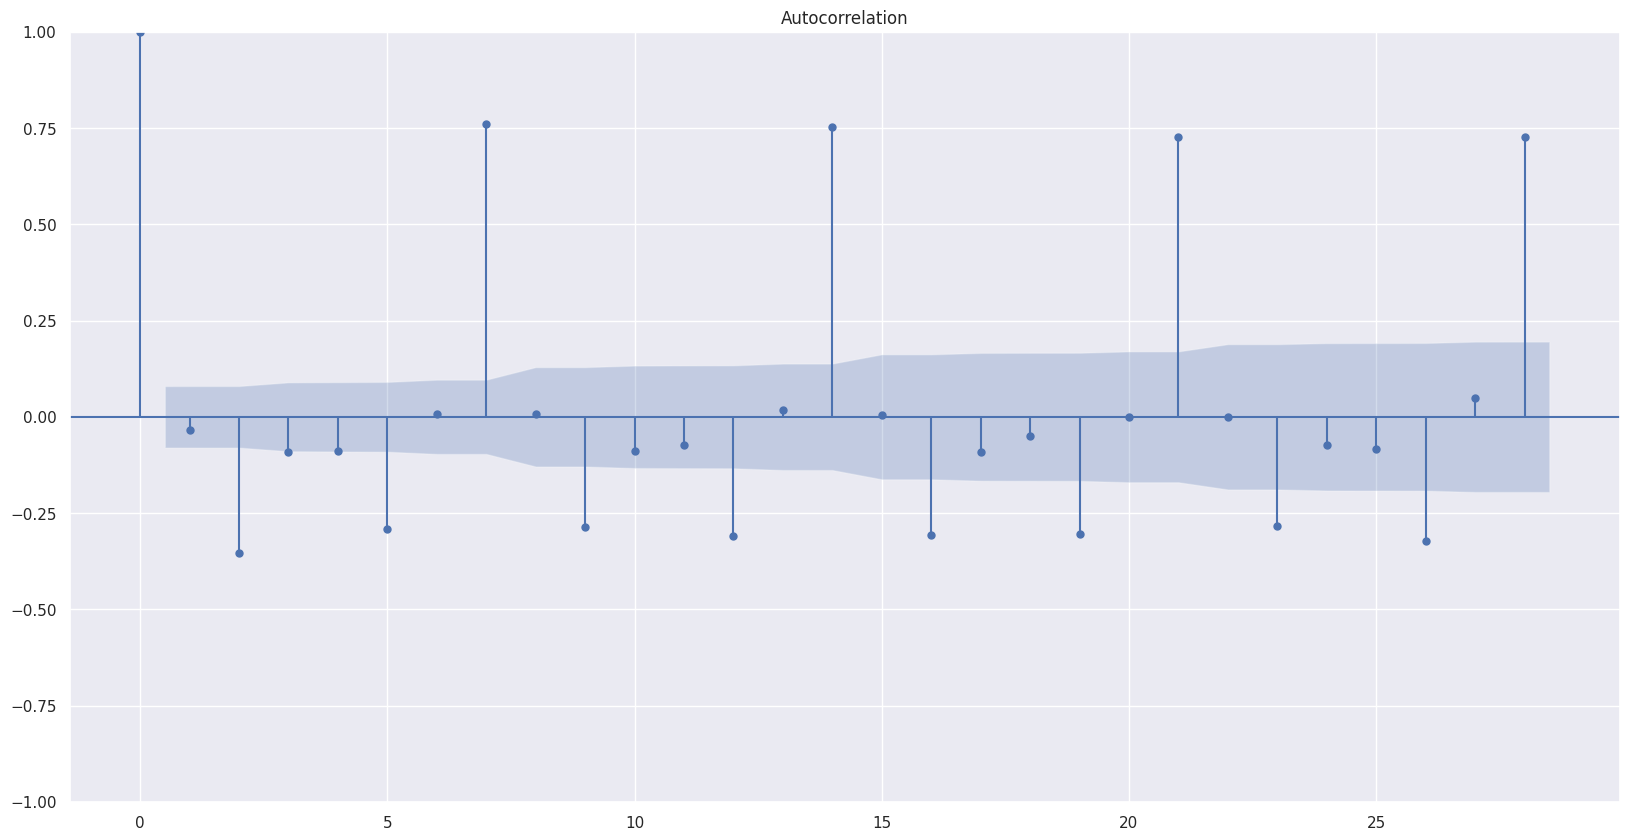

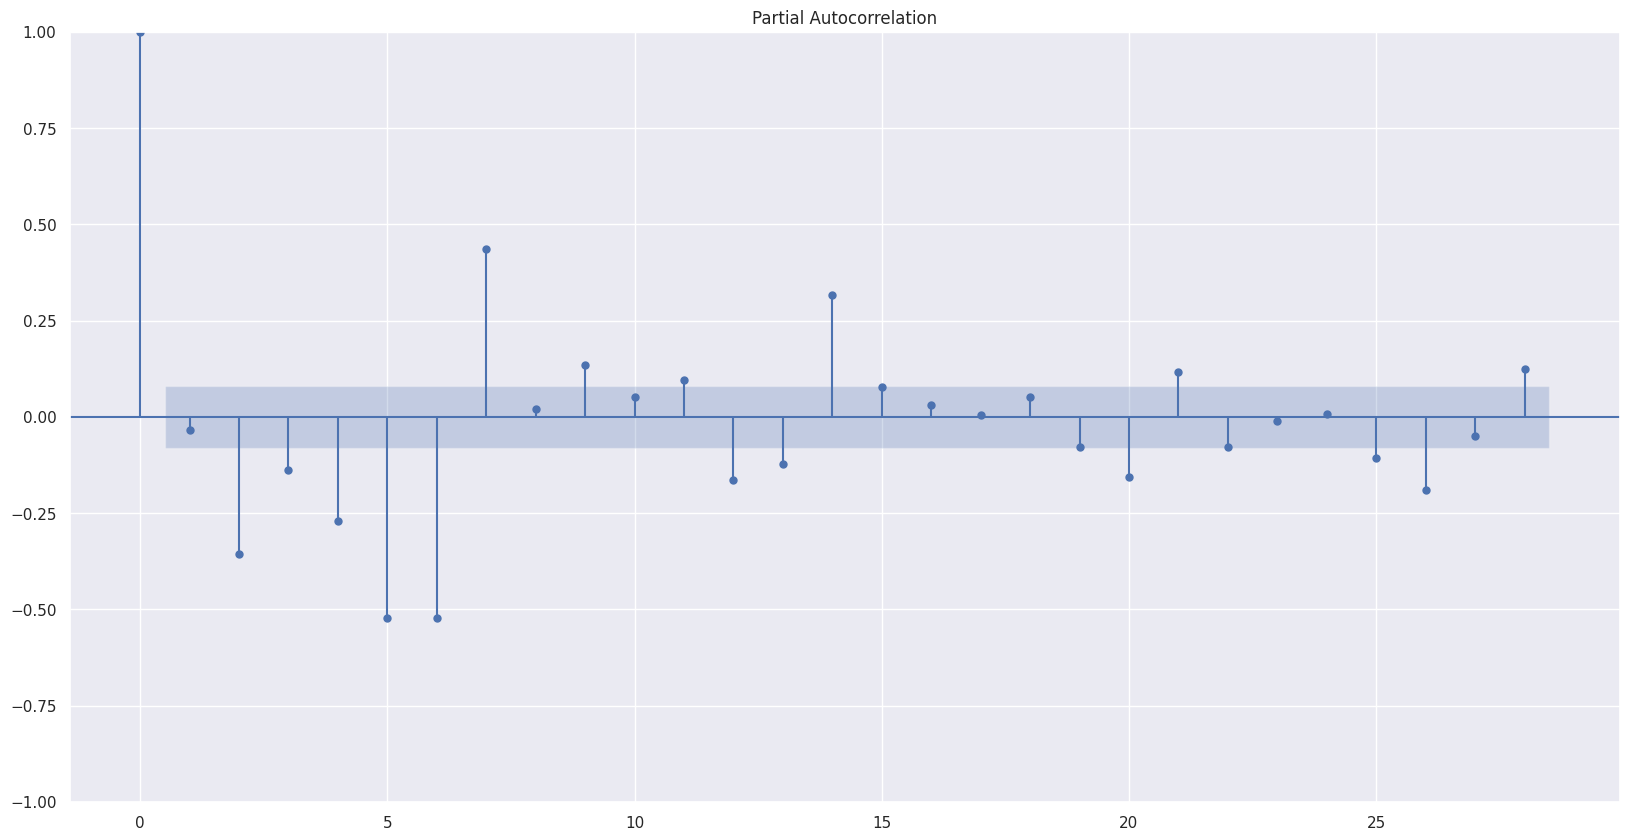

In [ ]:
# Grafico autocorrelación y autocorrelación parcial de la serie diferenciada

plot_acf(arg_diff);
plot_pacf(arg_diff);

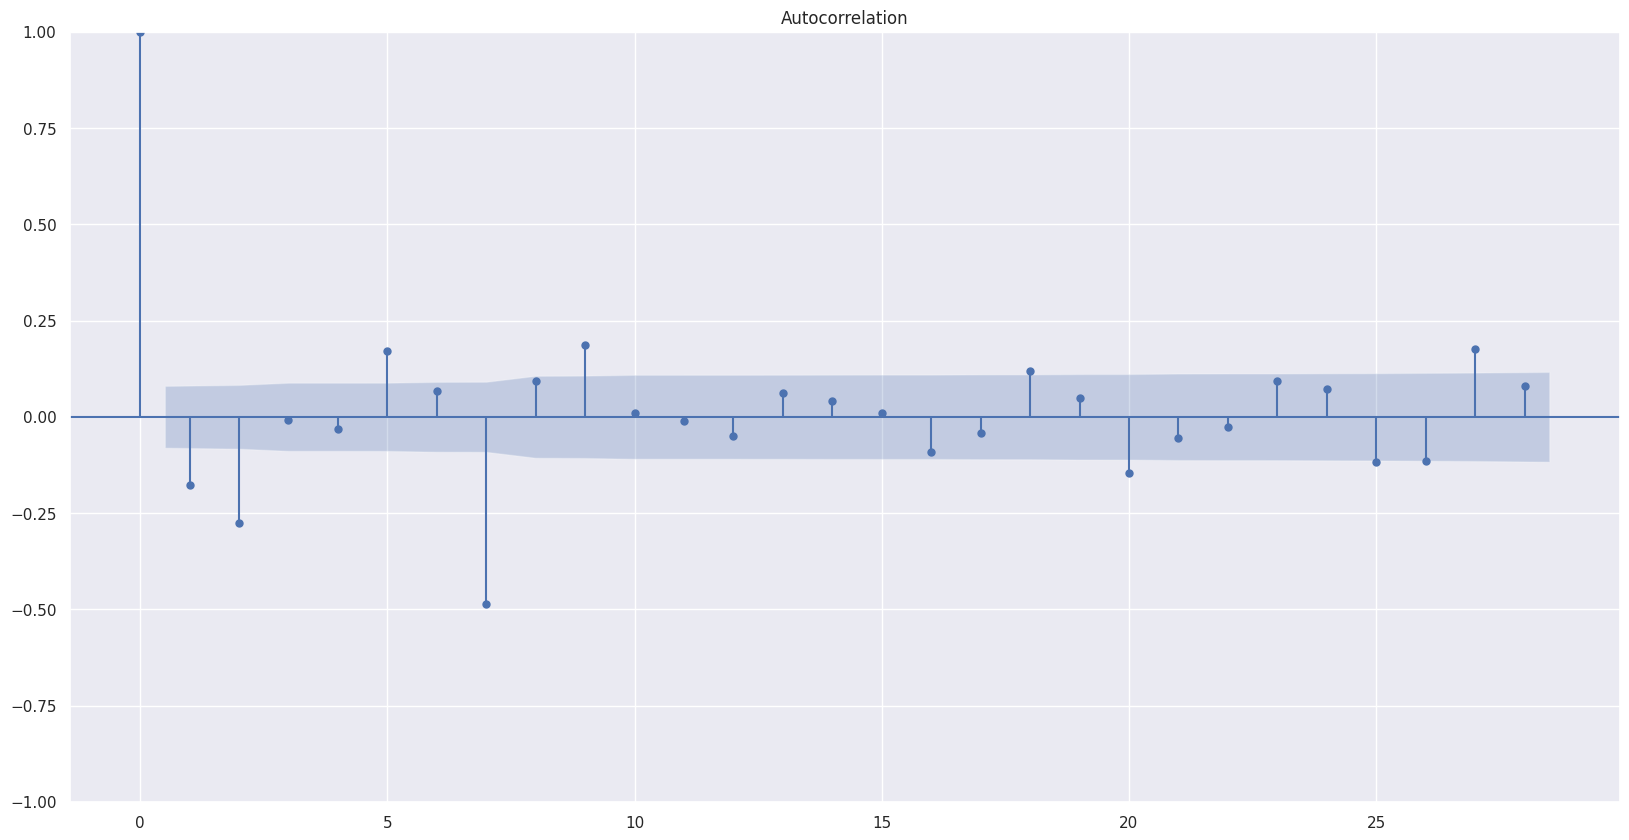

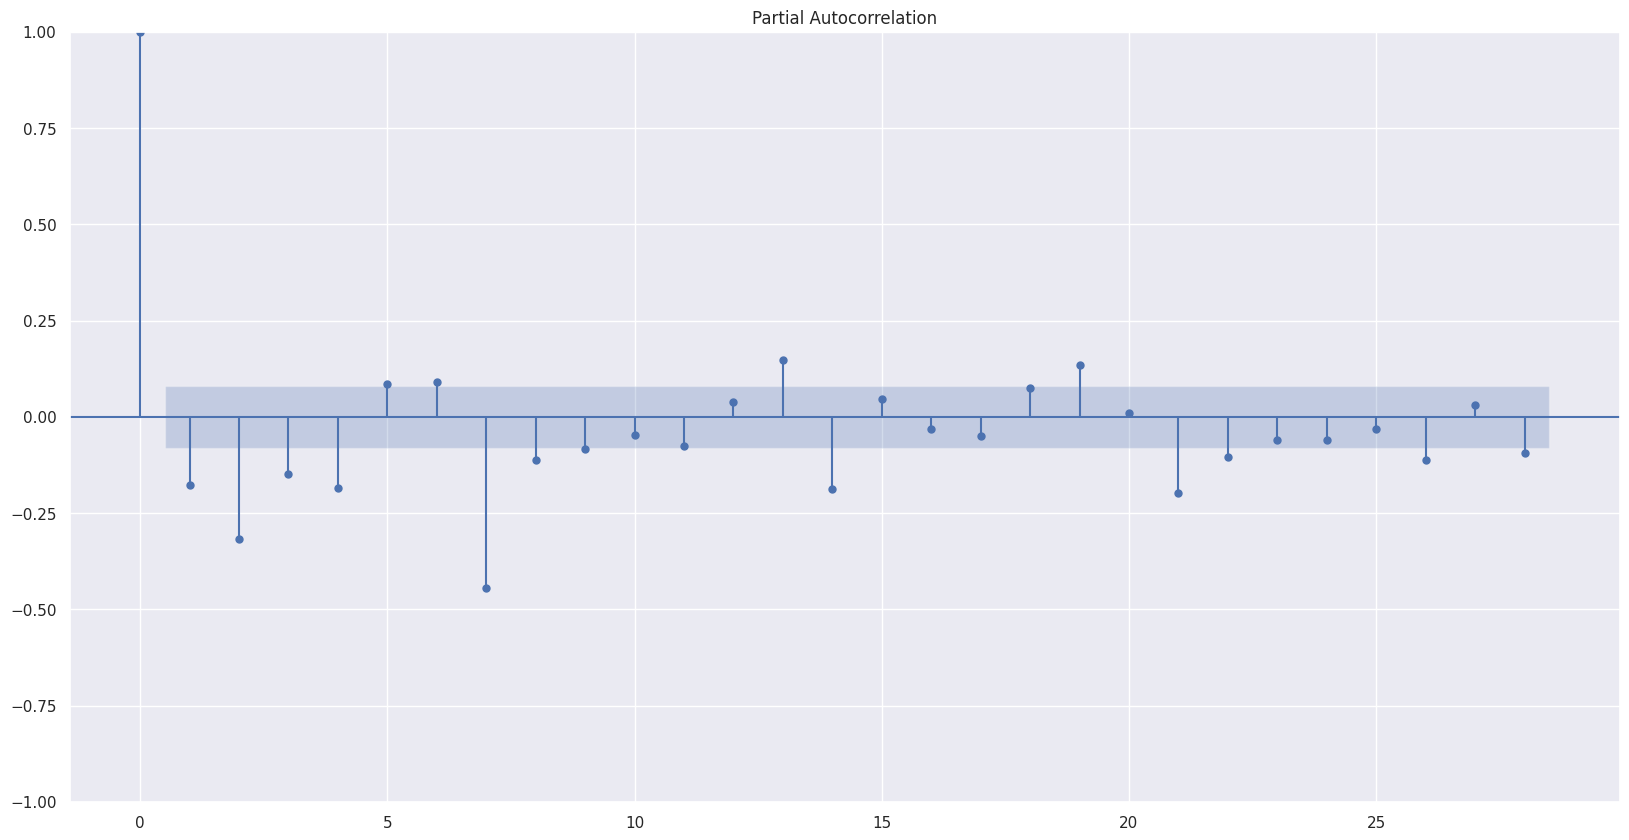

In [ ]:
# Grafico autocorrelación y autocorrelación parcial de la serie diferenciada sin estacionalidad

plot_acf(arg_diff_7);
plot_pacf(arg_diff_7);

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [ ]:
# Dicky Fuller Serie original
Augmented_Dickey_Fuller_Test_func(arg,'New_cases')

Results of Dickey-Fuller Test for column: New_cases
Test Statistic                  -2.029677
p-value                          0.273714
No Lags Used                    15.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# Dicky Fuller Serie diferenciada
Augmented_Dickey_Fuller_Test_func(arg_diff,'New_cases')

Results of Dickey-Fuller Test for column: New_cases
Test Statistic                  -5.203918
p-value                          0.000009
No Lags Used                    19.000000
Number of Observations Used    583.000000
Critical Value (1%)             -3.441616
Critical Value (5%)             -2.866510
Critical Value (10%)            -2.569417
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


In [ ]:
# Dicky Fuller Serie diferenciada sin estacionalidad
Augmented_Dickey_Fuller_Test_func(arg_diff_7,'New_cases')

Results of Dickey-Fuller Test for column: New_cases
Test Statistic                -5.860465e+00
p-value                        3.420008e-07
No Lags Used                   1.800000e+01
Number of Observations Used    5.770000e+02
Critical Value (1%)           -3.441734e+00
Critical Value (5%)           -2.866562e+00
Critical Value (10%)          -2.569445e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


In [ ]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = arg.iloc[:round(len(arg)*.80)]

# Seleccionamos el 20% restante para test
test = arg.iloc[round(len(arg)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train, test)

Date_reported
2020-03-06        4
2020-03-07        6
2020-03-08        2
2020-03-09        4
2020-03-10        8
              ...  
2021-06-27     9537
2021-06-28    22506
2021-06-29    22566
2021-06-30    21406
2021-07-01    20759
Name: New_cases, Length: 483, dtype: int64 Date_reported
2021-07-02    19326
2021-07-03    10630
2021-07-04     8251
2021-07-05    21734
2021-07-06    19635
              ...  
2021-10-26     1541
2021-10-27     1490
2021-10-28     1574
2021-10-29     1394
2021-10-30      799
Name: New_cases, Length: 121, dtype: int64


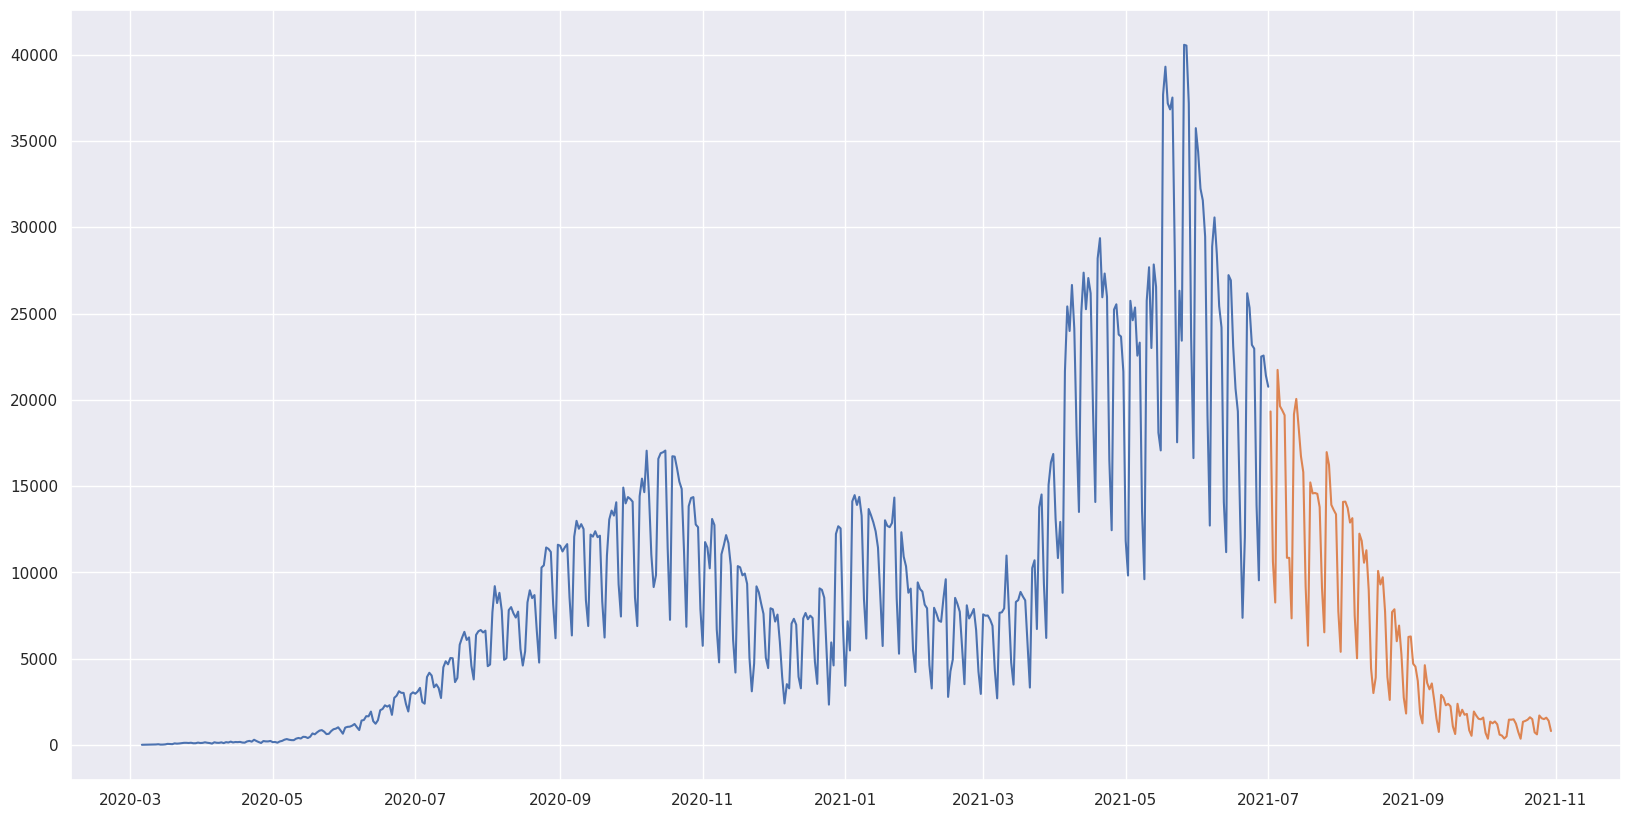

In [ ]:
# Visualización Train - Test

plt.plot(train)
plt.plot(test)

In [ ]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

auto_arima(train, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=9324.569, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=8932.307, Time=0.97 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=9129.740, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=9322.631, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=9326.121, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=8824.157, Time=1.95 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=8811.232, Time=2.77 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=8806.477, Time=1.33 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=9176.115, Time=0.19 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=8815.351, Time=6.35 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=9024.556, Time=1.08 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=8820.738, Time=2.54 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=8810.933, Time=1.37 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : 

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning:

Error fitting  ARIMA(3,1,0)(2,0,2)[7]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3

 ARIMA(3,1,0)(2,0,2)[7]             : AIC=inf, Time=nan sec
 ARIMA(2,1,0)(1,0,1)[7]             : AIC=inf, Time=2.64 sec
 ARIMA(4,1,0)(1,0,1)[7]             : AIC=8730.572, Time=2.17 sec
 ARIMA(4,1,0)(0,0,1)[7]             : AIC=9069.328, Time=0.60 sec
 ARIMA(4,1,0)(1,0,0)[7]             : AIC=8847.962, Time=2.39 sec
 ARIMA(4,1,0)(2,0,1)[7]             : AIC=8736.974, Time=5.23 sec
 ARIMA(4,1,0)(1,0,2)[7]             : AIC=8739.599, Time=4.67 sec
 ARIMA(4,1,0)(0,0,0)[7]             : AIC=9217.121, Time=0.23 sec
 ARIMA(4,1,0)(0,0,2)[7]             : AIC=8936.005, Time=2.86 sec
 ARIMA(4,1,0)(2,0,0)[7]             : AIC=8764.483, Time=2.27 sec
 ARIMA(4,1,0)(2,0,2)[7]             : AIC=inf, Time=4.11 sec
 ARIMA(5,1,0)(1,0,1)[7]             : AIC=8731.468, Time=2.80 sec
 ARIMA(4,1,1)(1,0,1)[7]             : AIC=inf, Time=5.04 sec
 ARIMA(3,1,1)(1,0,1)[7]             : AIC=8751.297, Time=4.44 sec
 ARIMA(5,1,1)(1,0,1)[7]             : AIC=8756.926, Time=6.04 sec
 ARIMA(4,1,0)(1,0,1)[7] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  483
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -4358.286
Date:                             Tue, 24 Oct 2023   AIC                           8730.572
Time:                                     23:17:31   BIC                           8759.817
Sample:                                 03-06-2020   HQIC                          8742.066
                                      - 07-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2433      0.025     -9.695      0.000      -0.292      -0.194
ar.L2         -0.3533      0.030    -11.672      0.000      -0.413      -0.294
ar.L3         -0.1974      0.027     -7.241      0.000      -0.251      -0.144
ar.L4         -0.1514      0.038     -3.950      0.000      -0.227      -0.076
ar.S.L7        0.9826      0.009    107.820      0.000       0.965       1.000
ma.S.L7       -0.6722      0.030    -22.189      0.000      -0.732      -0.613
sigma2      4.062e+06   1.18e+05     34.307      0.000    3.83e+06    4.29e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2254.90
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              74.00   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
modelo_sarima = SARIMAX(train, order=(4,1,0), seasonal_order=(1,0,1,7))
modelo_sarima = modelo_sarima.fit()
print(modelo_sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                      SARIMAX Results                                      
Dep. Variable:                           New_cases   No. Observations:                  483
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -4358.286
Date:                             Tue, 24 Oct 2023   AIC                           8730.572
Time:                                     23:17:46   BIC                           8759.817
Sample:                                 03-06-2020   HQIC                          8742.066
                                      - 07-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2433      0.025     -9.695      0.000      -0.292      -0.194
ar.L2         -0.3533      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [ ]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

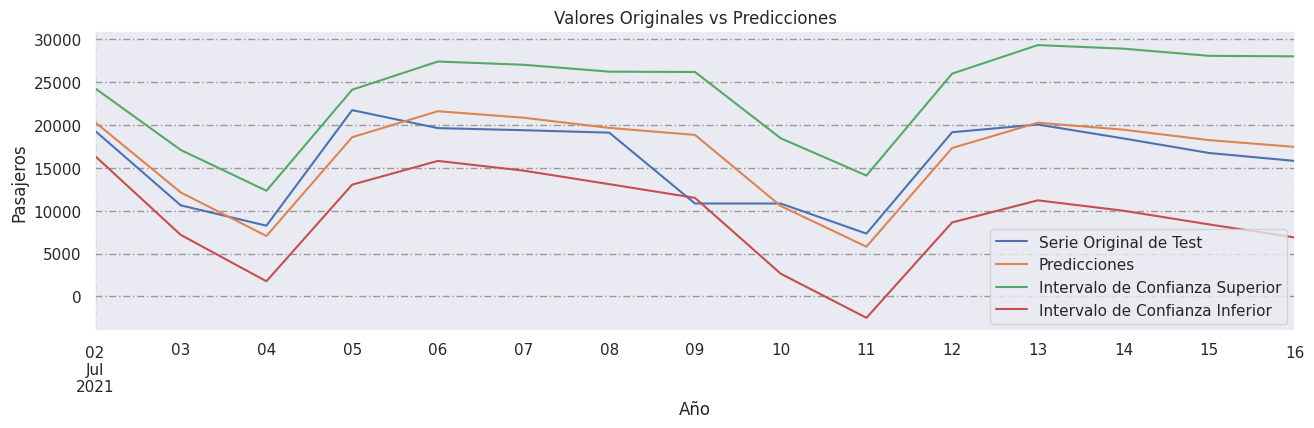

In [ ]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 15 días del test
predicciones_sarima = modelo_sarima.get_forecast(15)

# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test[:15], predicciones_sarima.predicted_mean, predicciones_sarima.conf_int())

In [ ]:
#Evaluamos las métricas del modelo
evaluar_metricas(test[:15], predicciones_sarima.predicted_mean )

MSE: 6456425.751416951
MAE: 1792.7086368156265
RMSE: 2540.9497734935558
MAPE: 0.1345


In [ ]:
# Pruebo el autoarima sin estacionalidad ( " seasonal = False ")
auto_arima(train, start_p=0, max_p=5, start_d=0, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=False, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9324.569, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9326.121, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9312.834, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9322.631, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9231.889, Time=1.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9177.361, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9259.731, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9177.169, Time=0.68 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9252.385, Time=0.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9131.172, Time=0.83 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9218.828, Time=0.39 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=9028.701, Time=0.89 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=9072.989, Time=0.89 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8946.161, Time=4.03 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  483
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -4463.674
Date:                Mon, 23 Oct 2023   AIC                           8943.349
Time:                        23:51:25   BIC                           8976.772
Sample:                    03-06-2020   HQIC                          8956.484
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4935      0.035     14.100      0.000       0.425       0.562
ar.L2         -0.8682      0.030    -28.722      0.000      -0.927      -0.809
ar.L3         -0.0649      0.038     -1.688      0.091      -0.140       0.010
ar.L4         -0.3957      0.027    -14.583      0.000      -0.449      -0.343
ar.L5         -0.3217      0.030    -10.649      0.000      -0.381      -0.262
ma.L1         -1.0438      0.022    -47.413      0.000      -1.087      -1.001
ma.L2          0.7871      0.019     41.361      0.000       0.750       0.824
sigma2      6.474e+06   2.13e-09   3.04e+15      0.000    6.47e+06    6.47e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               867.79
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):              86.98   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.89e+31. Standard errors may be unstable.
"""

In [ ]:
modelo_arima = sm.tsa.arima.ARIMA(train, order=(5,1,2), seasonal_order=(0, 0, 0, 0))
modelo_arima = modelo_arima.fit()

modelo_arima.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood opt

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  483
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -4463.674
Date:                Tue, 24 Oct 2023   AIC                           8943.349
Time:                        23:19:35   BIC                           8976.772
Sample:                    03-06-2020   HQIC                          8956.484
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4935      0.035     14.100      0.000       0.425       0.562
ar.L2         -0.8682      0.030    -28.722      0.000      -0.927      -0.809
ar.L3         -0.0649      0.038     -1.688      0.091      -0.140       0.010
ar.L4         -0.3957      0.027    -14.583      0.000      -0.449      -0.343
ar.L5         -0.3217      0.030    -10.649      0.000      -0.381      -0.262
ma.L1         -1.0438      0.022    -47.413      0.000      -1.087      -1.001
ma.L2          0.7871      0.019     41.361      0.000       0.750       0.824
sigma2      6.474e+06   2.13e-09   3.04e+15      0.000    6.47e+06    6.47e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               867.79
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):              86.98   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.89e+31. Standard errors may be unstable.
"""

In [ ]:
predicciones_arima = modelo_arima.get_forecast(len(test))

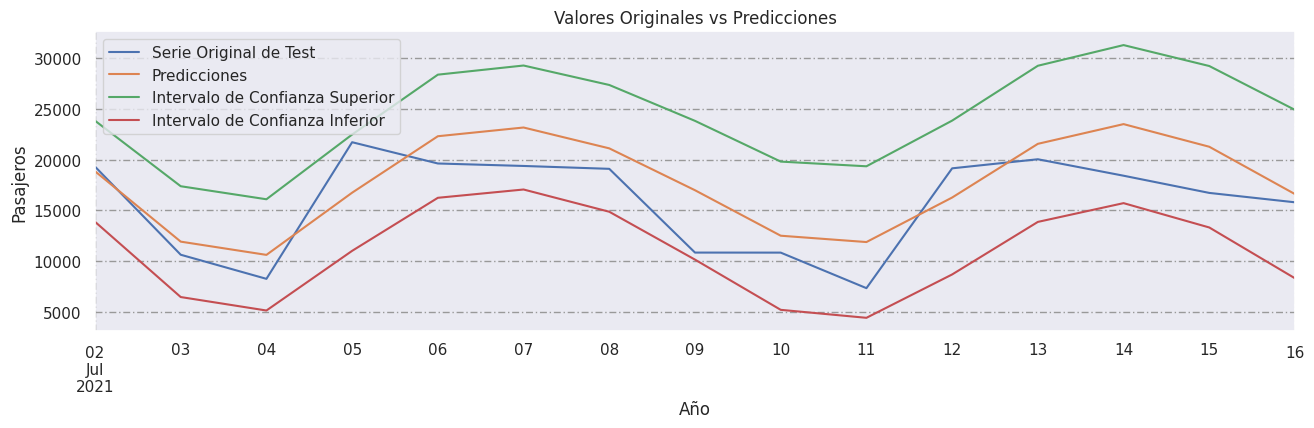

In [ ]:
predicciones_arima = modelo_arima.get_forecast(15)

graficar_pred(test[:15], predicciones_arima.predicted_mean, predicciones_arima.conf_int())

In [ ]:
evaluar_metricas(test[:15], predicciones_arima.predicted_mean)

MSE: 11818276.23438351
MAE: 2988.5104083478773
RMSE: 3437.771986968233
MAPE: 0.2178


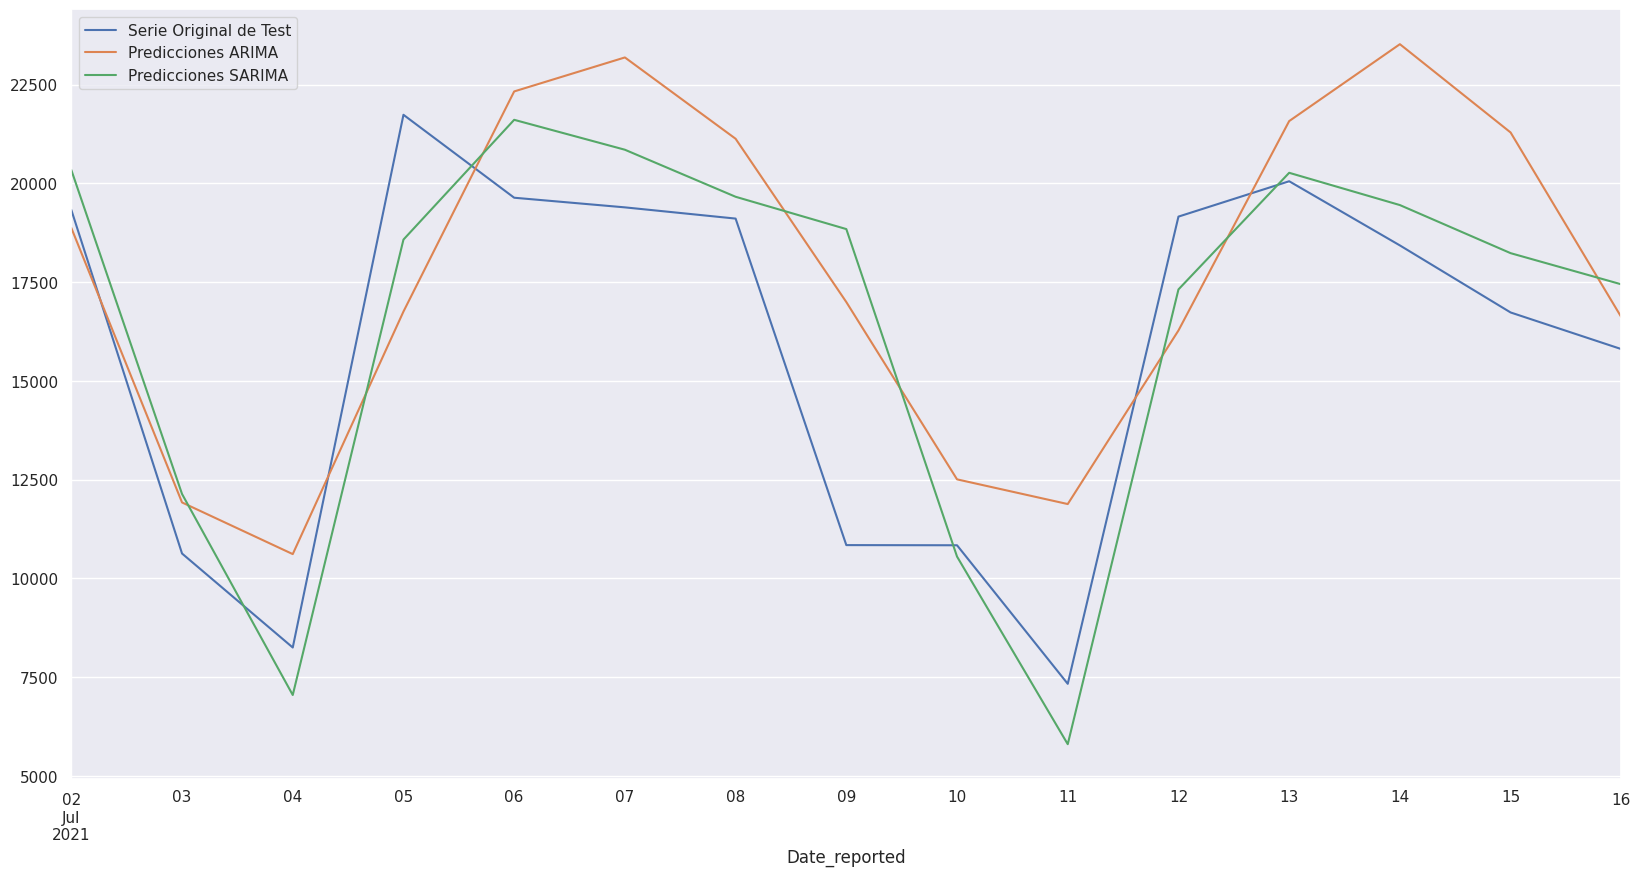

In [ ]:
test[:15].plot(label="Serie Original de Test")
predicciones_arima.predicted_mean.plot(label="Predicciones ARIMA")
predicciones_sarima.predicted_mean.plot(label="Predicciones SARIMA")
plt.legend()

In [ ]:
datos = {'Modelos': ['SARIMA','ARIMA'],
         'AIC': [modelo_sarima.aic, modelo_arima.aic],
         'BIC': [modelo_sarima.bic, modelo_arima.bic],
         'MAE': [modelo_sarima.mae, modelo_arima.mae],
         'MSE': [modelo_sarima.mse, modelo_arima.mse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

,Modelos,AIC,BIC,MAE,MSE
0,SARIMA,8730.571739,8759.817347,1153.699895,4.073374e+06
1,ARIMA,8943.348694,8976.772247,1536.191928,6.406437e+06


Date_reported
2020-03-14      -24.0
2020-03-15        7.0
2020-03-16        9.0
2020-03-17       25.0
2020-03-18      -10.0
               ...   
2021-06-29   -14070.0
2021-06-30     -323.0
2021-07-01     1505.0
2021-07-02    -1216.0
2021-07-03      376.0
Name: New_cases, Length: 477, dtype: float64 Date_reported
2021-07-04    1981.0
2021-07-05     514.0
2021-07-06   -2159.0
2021-07-07     916.0
2021-07-08     363.0
               ...  
2021-10-26    -209.0
2021-10-27    -122.0
2021-10-28     -58.0
2021-10-29     -68.0
2021-10-30     168.0
Name: New_cases, Length: 119, dtype: float64


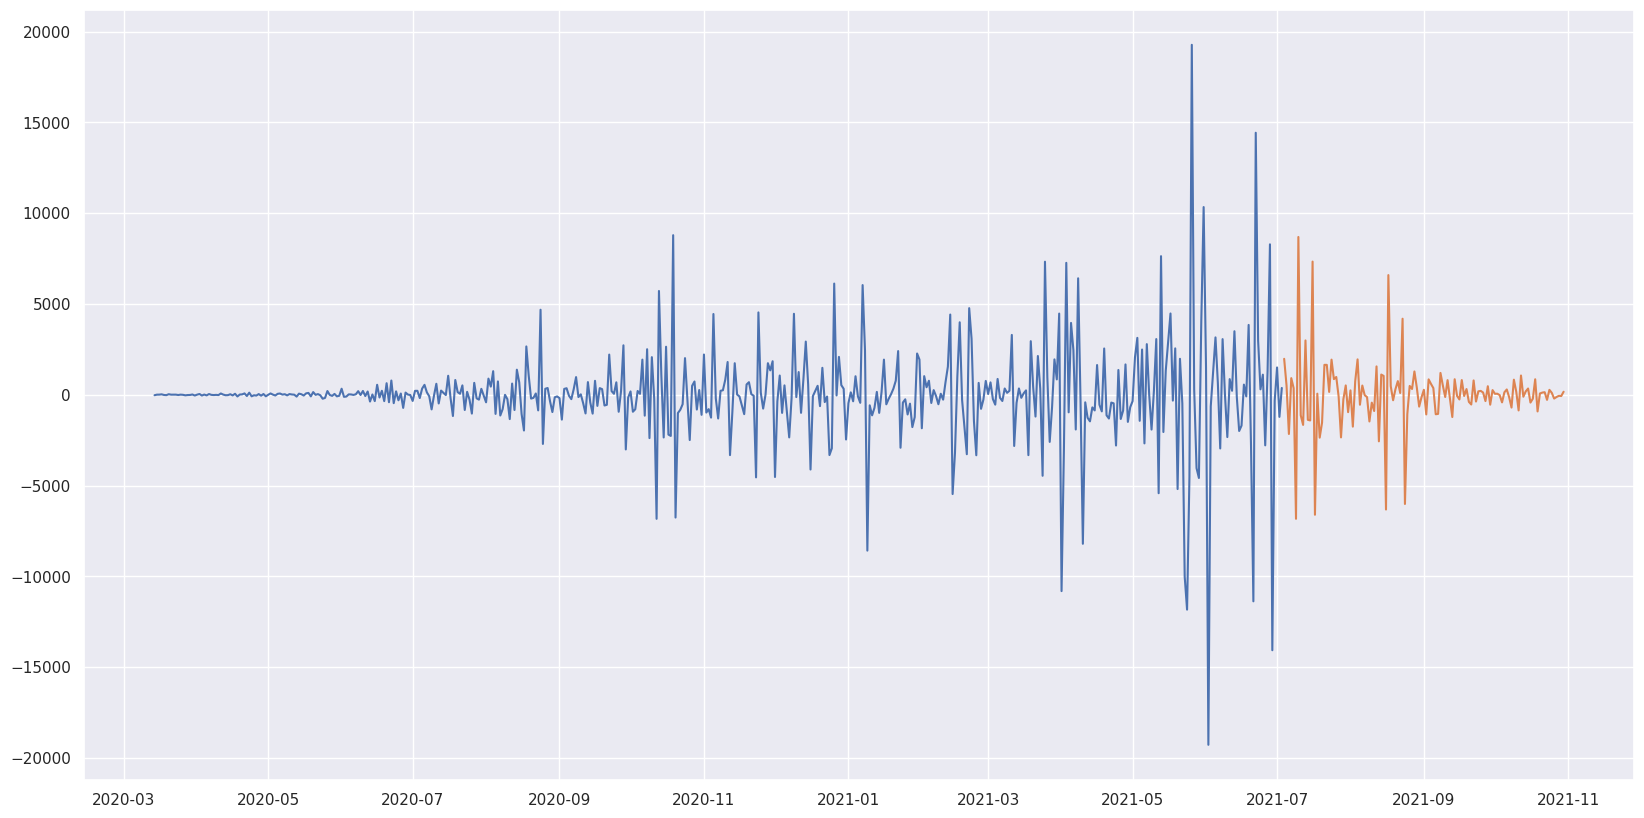

In [ ]:
# Separacion Train/Test la serie diferenciada sin estacionalidad
# Seleccionamos el primer 80% para train
train_diff_7 = arg_diff_7.iloc[:round(len(arg_diff_7)*.80)]

# Seleccionamos el 20% restante para test
test_diff_7 = arg_diff_7.iloc[round(len(arg_diff_7)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_diff_7, test_diff_7)

# Visualización Train - Test

plt.plot(train_diff_7)
plt.plot(test_diff_7)

In [ ]:
# Pruebo el autoarima sin estacionalidad ( " seasonal = False ")
auto_arima(train_diff_7, start_p=0, max_p=5, start_d=0, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=False, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8896.741, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8889.044, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8867.578, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=8803.465, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8802.326, Time=0.63 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8801.162, Time=1.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8804.832, Time=0.67 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=3.40 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=8784.585, Time=1.35 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=8795.573, Time=1.79 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=8772.033, Time=3.16 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=2.28 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=8762.998, Time=1.55 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=8761.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  477
Model:               SARIMAX(2, 0, 4)   Log Likelihood               -4373.862
Date:                Tue, 24 Oct 2023   AIC                           8761.723
Time:                        02:07:21   BIC                           8790.896
Sample:                    03-14-2020   HQIC                          8773.193
                         - 07-03-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3570      0.048     -7.394      0.000      -0.452      -0.262
ar.L2         -0.6556      0.034    -19.196      0.000      -0.723      -0.589
ma.L1          0.0899      0.056      1.595      0.111      -0.021       0.200
ma.L2          0.2960      0.037      8.012      0.000       0.224       0.368
ma.L3         -0.5258      0.026    -20.283      0.000      -0.577      -0.475
ma.L4         -0.4514      0.041    -11.089      0.000      -0.531      -0.372
sigma2      6.256e+06   2.33e+05     26.839      0.000     5.8e+06    6.71e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1245.08
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              62.48   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
modelo_arima = sm.tsa.arima.ARIMA(train_diff_7, order=(2,0,(0,1,1,1)), seasonal_order=(0, 0, 0, 0))
modelo_arima = modelo_arima.fit()

modelo_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                  New_cases   No. Observations:                  477
Model:             ARIMA(2, 0, [2, 3, 4])   Log Likelihood               -4374.440
Date:                    Tue, 24 Oct 2023   AIC                           8762.880
Time:                            02:10:24   BIC                           8792.053
Sample:                        03-14-2020   HQIC                          8774.350
                             - 07-03-2021                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9129     25.805     -0.268      0.789     -57.490      43.664
ar.L1         -0.2798      0.026    -10.566      0.000      -0.332      -0.228
ar.L2         -0.6586      0.042    -15.764      0.000      -0.741      -0.577
ma.L2          0.3174      0.033      9.647      0.000       0.253       0.382
ma.L3         -0.5405      0.020    -26.972      0.000      -0.580      -0.501
ma.L4         -0.4128      0.027    -15.273      0.000      -0.466      -0.360
sigma2      6.258e+06    2.3e+05     27.197      0.000    5.81e+06    6.71e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1179.72
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              62.79   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicciones_arima = modelo_arima.get_forecast(len(test_diff_7))

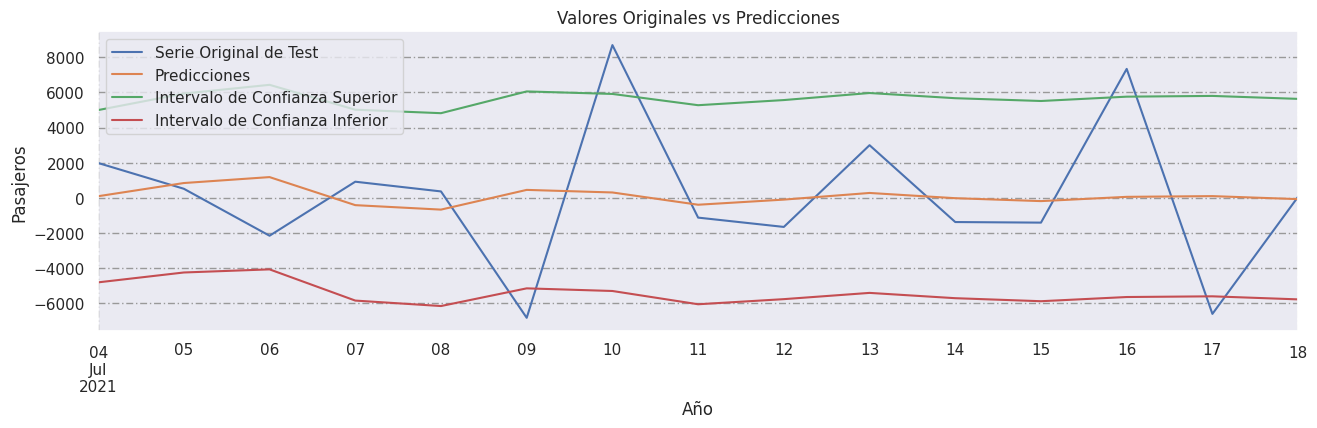

In [ ]:
predicciones_arima = modelo_arima.get_forecast(15)

graficar_pred(test_diff_7[:15], predicciones_arima.predicted_mean, predicciones_arima.conf_int())

In [ ]:
evaluar_metricas(test_diff_7[:15], predicciones_arima.predicted_mean)

MSE: 16849122.242977176
MAE: 3020.3895236330895
RMSE: 4104.76823255311
MAPE: 1.2048


In [ ]:
datos = {'Modelo': ['ARIMA'],
         'AIC': [modelo_arima.aic],
         'BIC': [modelo_arima.bic],
         'MAE': [modelo_arima.mae],
         'MSE': [modelo_arima.mse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

,Modelo,AIC,BIC,MAE,MSE
0,ARIMA,8762.880273,8792.052888,1329.417468,5.318962e+06


PROXIMO PASO, ANALIZAR LOS RESIDUOS. TENIENDO EN CUENTA =

Al analizar los residuos del modelo.

Sabiendo que, los residuos corresponden a la diferencia entre los valores observados y los valores ajustados según el modelo

Un buen método de pronóstico producirá residuos con las siguientes propiedades:

- 1. Los residuos no estén correlacionados.  Si hay correlación entre los residuales, esto es que queda información en los residuales que debe usarse para calcular los pronósticos

- 2. Los residuos tienen media cero. Si tienen media distinta a cero, esto significa que están sesgados.

- 3. Los residuos tienen varianza constante.

- 4. Los residuos se distribuyen normalmente.

FIN DEL CODIGO, GRACIAS !